# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Dataset

In [2]:
ds = pd.read_csv('../datasets/dataset_clean.csv')
ds.head()

,Developer_Name,Age_Rating,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Original_Release_Date,Current_Version_Release_Date,Price_USD,Primary_Genre,Languages
0,Wattana Kamdee,4+,-1.0,-1.0,0.0,0,2017-04-10,2017-04-10,0.00,Games,['EN']
1,CHEN-HUNG LEE,4+,-1.0,-1.0,0.0,0,2016-05-11,2019-05-30,6.99,Education,['EN']
2,CHEN-HUNG LEE,4+,-1.0,-1.0,0.0,0,2017-02-09,2019-05-30,0.00,Education,['EN']
3,Arab Bureau of Education for the Gulf States,4+,-1.0,-1.0,0.0,0,2017-11-21,2017-11-21,0.00,Education,['EN']
4,Phuong Anh Do,12+,4.5,202.0,4.5,118,2016-09-07,2018-01-17,0.00,Book,"['EN', 'VI']"


# Data Analysis & Visualization

--------------------------------------------------------------------------------------------------------------------
Most apps available on the Apple App Store consists of the following four genres: 
- **Games** (17905 Apps)
- **Business** (129608 Apps)
- **Education** (115845 Apps)
- **Entertainment**.(55847 Apps)
--------------------------------------------------------------------------------------------------------------------

In [3]:
ds['Primary_Genre'].value_counts()

Games                     179025
Business                  129608
Education                 115854
Entertainment              55847
Food & Drink               44183
Finance                    38414
Music                      17777
Lifestyle                  13740
Utilities                  12884
Book                       12674
Productivity               12448
Travel                      8571
Photo & Video               8072
Reference                   7845
Sports                      6225
Shopping                    5736
Stickers                    5219
Social Networking           5129
Medical                     4945
News                        4652
Health & Fitness            3805
Navigation                  1013
Magazines & Newspapers       377
Weather                      244
Name: Primary_Genre, dtype: int64

--------------------------------------------------------------------------------------------------------------------
Most apps available on the Apple App Store have an **Age Rating** of 4+, followed by 17+, 12+ and 9+.

**Age ratings are systems used to ensure that entertainment content, such as games, but also films, tv shows or mobile apps, is clearly labelled with a minimum age recommendation based on the content they have.**

--------------------------------------------------------------------------------------------------------------------

In [4]:
ds['Age_Rating'].value_counts()

4+               559388
17+               64841
12+               44931
9+                25121
Not yet rated         6
Name: Age_Rating, dtype: int64

--------------------------------------------------------------------------------------------------------------------

Applications targeting **Young Teens (12-14 years)** have the **highest average selling price (USD)** on the Apple App Store while the apps targeted for **middle age children (9-11 years)** have the **second lowest average selling price**, with the lowest being on apps which are not yet rated (Demonstrated Visually in the figure given in cell 6).

--------------------------------------------------------------------------------------------------------------------

In [5]:
# Dataset for Average Price of Each Age Rating
ds_rating = ds.groupby('Age_Rating', as_index=False)['Price_USD'].mean()
ds_rating = ds_rating.sort_values('Price_USD', ascending = False).reset_index(drop = True)
ds_rating

,Age_Rating,Price_USD
0,12+,0.561311
1,4+,0.529953
2,17+,0.477918
3,9+,0.445773
4,Not yet rated,0.165000


<AxesSubplot:xlabel='Age_Rating', ylabel='Price_USD'>

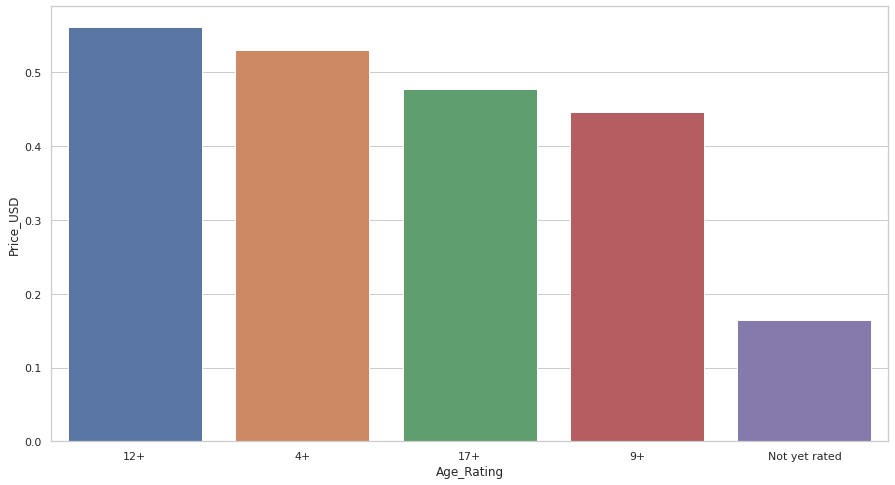

In [6]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
sns.barplot(x="Age_Rating", y="Price_USD", data=ds_rating)

--------------------------------------------------------------------------------------------------------------------
Developers like **MacHead, BRABUS, Caladan Software, etc.**, have the **highest selling average price (USD)** on their apps with total publishing on Apple App Store being **18, 2 & 2** respectively (Demonstrated Visually in the figure given in cell 9).

--------------------------------------------------------------------------------------------------------------------

In [7]:
# Dataset for Average price of apps of each Developer
ds_dev = ds.groupby('Developer_Name', as_index=False)['Price_USD'].mean()
ds_dev = ds_dev.sort_values('Price_USD', ascending = False).reset_index(drop = True)
ds_dev.head()

,Developer_Name,Price_USD
0,MacHead,999.99
1,BRABUS,999.99
2,Caladan Software,999.99
3,TDDAPPS LLC,999.99
4,"Advanced Magnetic Analytics, LLC",549.99


In [8]:
ds_dev['Dev_Count'] = ds['Developer_Name'].map(ds['Developer_Name'].value_counts())
ds_dev

,Developer_Name,Price_USD,Dev_Count
0,MacHead,999.99,18
1,BRABUS,999.99,2
2,Caladan Software,999.99,2
3,TDDAPPS LLC,999.99,2
4,"Advanced Magnetic Analytics, LLC",549.99,4
...,...,...,...
262157,"Dominion IT Consulting, LLC",-1.00,3
262158,Cornfox & Brothers Ltd.,-1.00,3
262159,TENDAYS STUDIO PTE. LTD.,-1.00,1
262160,The Marble Collective,-1.00,29


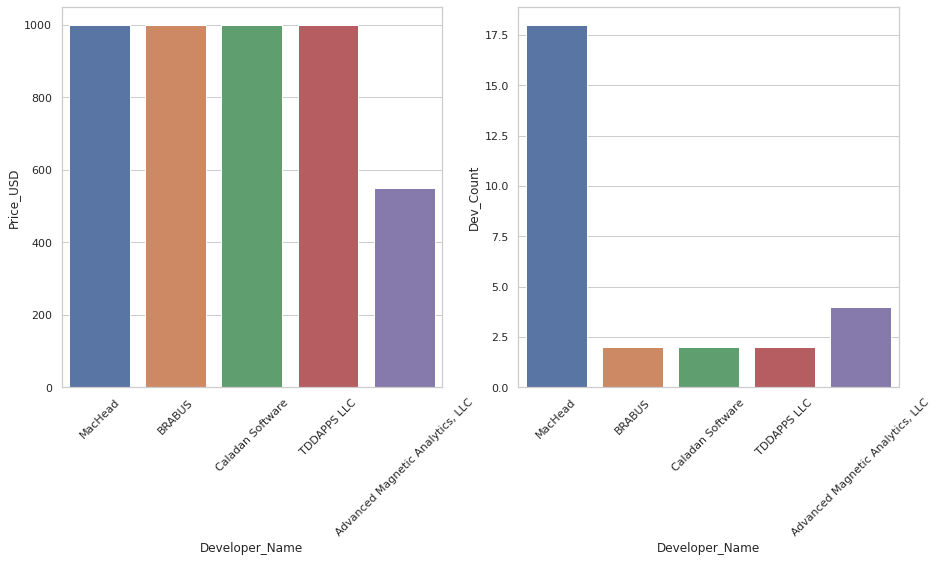

In [9]:
# Plots
sns.set_theme(style="whitegrid")
fig, ax =plt.subplots(1,2, figsize=(15,7))
sns.barplot(x="Developer_Name", y="Price_USD", data=ds_dev.head(),ax=ax[0])
ax[0].tick_params(axis='x', rotation=45)
sns.barplot(x="Developer_Name", y="Dev_Count", data=ds_dev.head(),ax=ax[1])
ax[1].tick_params(axis='x', rotation=45)